<a href="https://colab.research.google.com/github/phmouras/Critical-Phenomena-in-gravitational-collapse-via-spectral-methods/blob/main/Heat_eq_collocation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import exp

# Pseudoespectral method for one dimensional heat equation


# tphi + xxphi = 0;  unidimensional

N = 14

L0 = 1

x1 = np.cos(np.arange(N+3)*math.pi / (N+2))     # Collocation points [-1,1]
x = x1[1:N+2]     # Collocation points [-1,1]


# Base Matrix (Tchebyshev Polinomials):

T = np.zeros([N+3,N+1])
xT = np.zeros([N+3,N+1])
xxT = np.zeros([N+3,N+1])

T[0,] = 1
T[1,] = x

for i in range(2,N+3):
  T[i,] = 2*x*T[i-1,] - T[i-2,]

# Derivada Matriz Base:

xT[0,] = 0
xT[1,] = 1

for i in range(2, N+3):
  xT[i,] = 2*x*xT[i-1,] + 2*T[i-1,] - xT[i-2,]


xxT[0,] = 0
xxT[1,] = 0

for i in range(2, N+2):
  xxT[i,] = 2*xT[i-1,] + 2*x*xxT[i-1,] + 2*xT[i-1,] - xxT[i-2,]

# First base function

psi = T[0:N+1,:]
xpsi = xT[0:N+1,:]

# Second base function: Chebyshev combination - [-1,1]
psi_2 = np.zeros([N+1,N+1])

for j in range(len(x)):
  psi_2[j,:] = T[j+2] - T[j]

# Initial conditions

f_0 = np.sin(x*math.pi)              # exact solution in t=0 at collocation points

inv_psi = np.linalg.inv(psi_2)

a0 = np.dot(f_0, inv_psi)  # coeficients a(0)

phi = np.dot(a0, psi_2)      # exact solution in t=0



In [ ]:
# Plot: Condições Iniciais

M = 3000

xplot = np.linspace(-1,1,M)

Tplot = np.zeros([N+3,M])

Tplot[0,] = 1
Tplot[1,] = xplot


for i in range(2,N+3):
  Tplot[i,] = 2*xplot*Tplot[i-1,] - Tplot[i-2,]

# First base function
psiplot = Tplot[0:N+1,:]

# Second base function: Chebyshev combination - [-1,1]
psiplot_2 = np.zeros([N+1,M])

for j in range(len(x)):
  psiplot_2[j,:] = Tplot[j+2] - Tplot[j]


fplot_0 = np.sin(xplot*math.pi)

phiplot = np.dot(a0, psiplot_2)

erro = abs(phiplot - fplot_0)


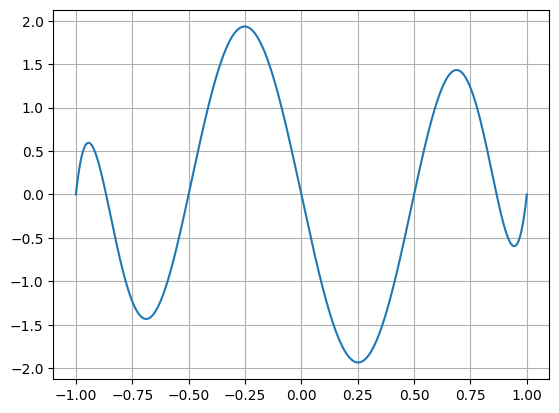

In [ ]:
plt.plot(xplot, psiplot_2[5], label = 'Solução exata')
plt.grid()

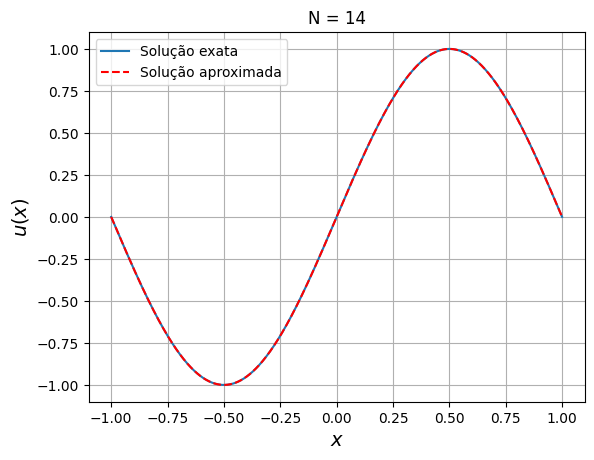

In [ ]:
plt.plot(xplot, fplot_0, label = 'Solução exata')
plt.plot(xplot, phiplot,'--r', label = 'Solução aproximada')
plt.xlabel('$x$', fontsize = 14)
plt.ylabel('$u(x)$', fontsize = 14)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.legend()
plt.title(f'N = {N}')
plt.grid()

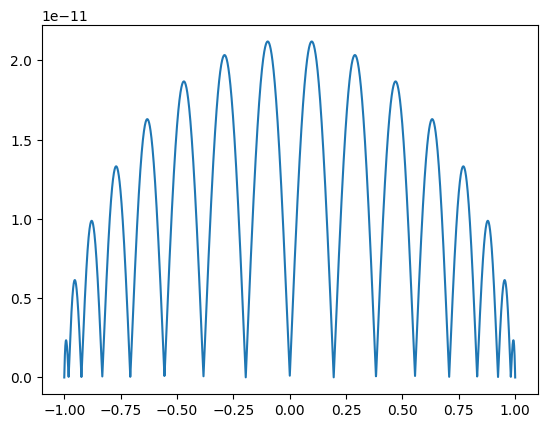

In [ ]:
plt.plot(xplot, erro)

In [ ]:
# Quadratura Gauss integration for L2_error

Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq)

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

wq_col = gauss_quadrature[1]    # Legendre weight (Verificado)


qT = np.zeros([Nq+2,Nq])
qxT = np.zeros([Nq+2,Nq])


qT[0,] = 1
qT[1,] = new_col

for i in range(2,Nq+2):
  qT[i,] = 2*new_col*qT[i-1,] - qT[i-2,]

# Derivada Matriz Base:

qxT[0,] = 0
qxT[1,] = 1

#qxT[0,] = xq*qcolT[0,]
#qxT[1,] = xq*qcolT[1,]

for i in range(2,Nq+2):
  qxT[i,] = 2*new_col*qxT[i-1,] + 2*qT[i-1,] - qxT[i-2,]

qpsi = qT[0:N+1,:]
col_qpsi = qxT[0:N+1,:]

qpsi_2 = np.zeros([N+1,Nq])

for j in range(N+1):
  qpsi_2[j,:] = qT[j+2] - qT[j]
#rrqpsi = qrrSB[0:N+1,:]

qf_0 = np.sin(new_col*math.pi)              # exact solution in t=0 at collocation points

qphi = np.dot(a0, qpsi_2)      # exact solution in t=0 in quadrature points

qerror = abs(qphi-qf_0)


L2_error = ((1/2*np.dot(qerror**2,wq_col))**1/2)    # L2 error of HC in t=0



In [ ]:
L2_error

7.476378645520614e-23

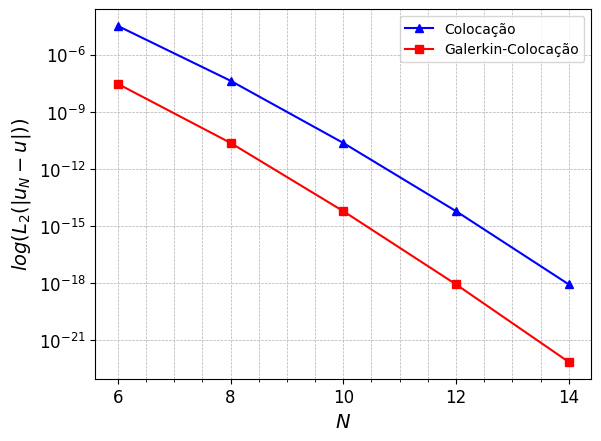

In [3]:

# Plot L2_error for L0 = 1 and N:

# L2_error for L0 = 1 and for N = 2,4,6,8,10


# First base function error:
L2_error_6_1 = 3.1643865412624126e-05
L2_error_8_1 = 4.207111175427345e-08
L2_error_10_1 = 2.296895599365407e-11
L2_error_12_1 = 6.090407297824295e-15
L2_error_14_1 = 8.78264274733398e-19

# Second base function error:
L2_error_6_2 = 2.8958371840099343e-08
L2_error_8_2 = 2.3190780032715608e-11
L2_error_10_2 = 6.0897534657057246e-15
L2_error_12_2 = 8.782646673204983e-19
L2_error_14_2 = 7.476378645520614e-23

L2_error_1 = [L2_error_6_1, L2_error_8_1,L2_error_10_1,L2_error_12_1,L2_error_14_1]

L2_error_2 = [L2_error_6_2, L2_error_8_2,L2_error_10_2,L2_error_12_2,L2_error_14_2]


N_list = [6,8,10,12,14]

N_max = 14

plt.plot(N_list, L2_error_1, '-b^', label = "Colocação")
plt.plot(N_list, L2_error_2,'-rs', label = "Galerkin-Colocação")
plt.xticks(N_list)
plt.tick_params(axis='both', which='both', labelsize=12)  # Ajusta o tamanho dos ticks em ambos os eixos
plt.xlabel('$N$', fontsize = 14)
plt.ylabel('$log(L_2(|u_N - u|))$', fontsize = 14)
plt.yscale('log')
plt.grid(which='both', linestyle='--', linewidth=0.5)  # Grades principais
plt.minorticks_on()  # Ativa grades menores
plt.legend()
plt.show()

In [ ]:
#Runge-Kutta 4th order

h = 0.01
tf = 100

It = int(tf/h)

t = np.linspace(0, tf, It)

phi_set = []

#phi0_set = np.zeros([0,It])

t = 0

while t <= tf:  # Runge Kutta 4th order

  xxphi = np.dot(a0, xxpsi)
  da = np.dot(np.dot(a0, xxpsi), inv_psi)
  K1 = h*(da)

  xxphi = np.dot(a0 + K1/2, xxpsi)
  da = np.dot(xxphi, inv_psi)
  K2 = h*(da)

  xxphi = np.dot(a0 + K2/2, xxpsi)
  da = np.dot(xxphi, inv_psi)
  K3 = h*(da)

  xxphi = np.dot(a0 + K3, xxpsi)
  da = np.dot(xxphi, inv_psi)
  K4 = h*(da)

  t = t + h

  a0 = a0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)
  phi_set.append(np.dot(a0, psiplot))



KeyboardInterrupt: 

In [ ]:
It

10000

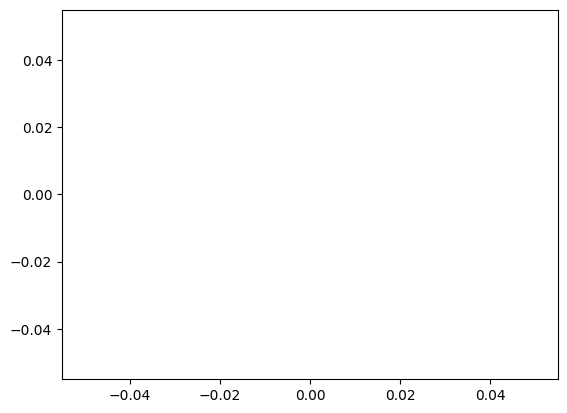

In [ ]:
plt.plot(xplot, phi_set[9999])

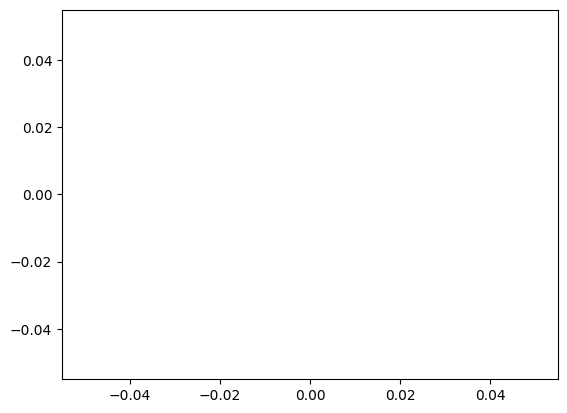

In [ ]:
for i in range(It):
  plt.plot(xplot, phi_set[i])

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '640x480', '-pix_fmt', 'rgba', '-r', '5000.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/tmp/tmpncehqkgm/temp.m4v']' returned non-zero exit status 255.

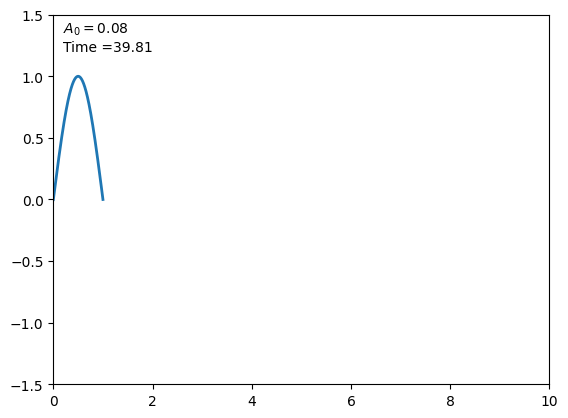

In [ ]:
# Animation plot for Phi: Scalar Field dispersion

from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib as mpl

fig = plt.figure()
ax = plt.axes(xlim=(0, 10),ylim = (-1.5, 1.5))
line, = ax.plot([], [], lw=2)
initA0_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
time_text = ax.text(0.02, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    initA0_text.set_text('')
    time_text.set_text('')
    return line,

def animate(i):
  y = phi_set[i]
  line.set_data(xplot, y)
  initA0_text.set_text("$A_0 = 0.08$")
  time_text.set_text("Time ="+str(round(h+h*i,2)))
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=0.2, blit=True)


HTML(anim.to_html5_video())

#anim.save("animation_MS_dispersion.mp4")

